In [1]:
import math

import numpy as np
from rdp import rdp
import time
from matplotlib import pyplot as plt
import pandas as pd
from os.path import join
import os
import math
from utilities import runQueryDTheta, loadData, donor_acceptor_dist
# %matplotlib widget

dataPath = r"C:\Users\ashamail\Box\Shared Materials_Abdullah_Hasan\Abdullah Data\allAtomsWithRings.csv"
savePath = r"C:\Users\ashamail\Desktop\drug-polymers\adbis extension\data\ellipsoids"
savepathDrive = r"C:\Users\ashamail\OneDrive - Iowa State University\Molecular Simulation Data\adbis extension data"
oxygenPath = r"C:\Users\ashamail\OneDrive - Iowa State University\Molecular Simulation Data\Text Data Files\flavanone_R1_os_0-200K.csv"
oxygen_location = r"C:\Users\ashamail\Desktop\data\os_200_1.txt"
nitrogenPath = r"C:\Users\ashamail\Desktop\data\nitrogen200k.txt"



In [2]:
data = pd.read_csv(dataPath)
# oxygen = pd.read_csv(oxygenPath, header=None)
# oxygen = oxygen.rename(columns={0: "x", 1: "y", 2: "z"})
oxygen = loadData(oxygen_location)
nitrogen = loadData(nitrogenPath)
min_z_points = pd.read_csv(join(savepathDrive, "min_z_points.csv"))

PSP = 44

In [3]:
def magnitude(vector):
    return np.linalg.norm(vector)

def numerator(currentPoint, basePointA, basePointB):
    xp, yp  = currentPoint
    xa, ya = basePointA
    xb, yb = basePointB
    
    return magnitude(
            np.cross(
                    [xp - xa, yp - ya ], 
                    [xb - xa, yb - ya ]
                )
            )

def denominator(basePointA, basePointB):
    xa, ya = basePointA
    xb, yb = basePointB
    
    return magnitude([xb - xa, yb - ya ])

def giveDistance(point, a, b):
    return numerator(point, a, b) / denominator(a, b)

def spm(data, epsilon):
    drugTraj = data

    a = drugTraj[0]
    b = drugTraj[-1]

    newTrajectory = np.array([[a[0], a[1], 0]])

    for i in range(1, len(drugTraj) - 1):
        p = drugTraj[i]
        distance = giveDistance(p, a, b)
        if distance > epsilon:
            newTrajectory = np.append(newTrajectory, np.array([[p[0], p[1], i]]), axis=0)
            a = p
    newTrajectory = np.append(newTrajectory, np.array([[b[0], b[1], len(drugTraj) - 1]]), axis=0)

    return newTrajectory

In [8]:
# for all timesteps
# can also plot an instance using the line below
# plot_ell_and_plane(ell, points)

saveLocation = r"C:\Users\ashamail\OneDrive - Iowa State University\Molecular Simulation Data\adbis extension data\e_gatco + spmrdp"
d_deltas = np.arange(-6, 7, 1)
epsilons = [0.5, 0.75, 1]
countPerDelta = {}

toappend = np.arange(200000)
toappend = toappend.reshape(toappend.shape[0], 1)
rflOxygen = np.append(oxygen[:,0,:], toappend, axis = 1)

min_z_points["difference"] = min_z_points["min_z"].apply(lambda x: (x - PSP))
for epsilon in epsilons:
    for delta in d_deltas:
        s1 = time.time()
        countPerDelta[delta] = {}
        points_less_than_delta = min_z_points[min_z_points["difference"] < delta] #calculate ellipsoid and then calculate distance between min point and PSP using d_delte (1,2,3,4)
        # print(points_less_than_delta)

        # display(min_z_points[["min_z", "timestep"]].values)
        
        
        s1 = time.time()
        spm_out = spm(points_less_than_delta[["min_z", "timestep"]].values, epsilon)
        timesteps = spm_out[:, 2].astype(int)
        print(timesteps.shape)
        
        print(delta, epsilon, "pre-processing", time.time() - s1)

        # print(delta, epsilon, "done with pre processing, starting file saving")


        # temp = rflOxygen[timesteps]
        # np.savetxt(join(saveLocation, "spm", str(epsilon), str(delta), "oxygen.csv"), temp, delimiter=",")
        # tempnitrogen = nitrogen[timesteps]
        # for i in range(216):
        # #     nitrogen[:,i,:].shape
        #     nitrogeni = np.append(tempnitrogen[:,i,:], timesteps.reshape(timesteps.shape[0], 1), axis = 1)
        #     np.savetxt(join(saveLocation, "spm", str(epsilon), str(delta), str(i)+"-nitrogen.csv"), nitrogeni, delimiter=",")
        # print(delta, epsilon, "done with saving files, starting query")
        s = time.time()
        a, b = donor_acceptor_dist(oxygen[:,0,:], nitrogen, timesteps, hbond_threshold = 3.5 + 2*epsilon)
    # timesteps = runQueryDTheta(np.array(points_less_than_delta["timestep"]), oxygen, PSP) #for each d_delta instances, run the d_theta query
        print(delta, epsilon, "query-processing", a.shape, time.time() - s)
        countPerDelta[delta][epsilon] = a

# for key, val in countPerDelta.items():
#     print(key, val.shape[0])

(24334,)
-6 0.5 pre-processing 2.8019940853118896
-6 0.5 query-processing (196,) 5.569084167480469
(26504,)
-5 0.5 pre-processing 2.9840590953826904
-5 0.5 query-processing (274,) 5.954052209854126
(28724,)
-4 0.5 pre-processing 3.571000576019287
-4 0.5 query-processing (244,) 6.861089468002319
(30955,)
-3 0.5 pre-processing 3.6430065631866455
-3 0.5 query-processing (261,) 7.092081069946289
(33158,)
-2 0.5 pre-processing 3.7920045852661133
-2 0.5 query-processing (266,) 7.512098550796509
(35194,)
-1 0.5 pre-processing 4.063065528869629
-1 0.5 query-processing (264,) 7.921051740646362
(37200,)
0 0.5 pre-processing 4.28201150894165
0 0.5 query-processing (264,) 8.43810510635376
(39061,)
1 0.5 pre-processing 4.486037492752075
1 0.5 query-processing (277,) 8.998058080673218
(40954,)
2 0.5 pre-processing 4.7970335483551025
2 0.5 query-processing (257,) 9.231084108352661
(42861,)
3 0.5 pre-processing 4.924049615859985
3 0.5 query-processing (251,) 9.617055654525757
(44758,)
4 0.5 pre-proces

In [6]:
a

array([19126, 19132, 19200, 19210, 19227, 19240, 19416, 19427, 19429,
       19435, 19439, 19441, 19442, 19446, 19468, 19469, 19477, 19491,
       19492, 19493, 19495, 19497, 19498, 19500, 19510, 19515, 19516,
       19535, 19537, 19557, 19558, 19575, 19666, 19667, 19668, 19669,
       19671, 19672, 19673, 23641, 24257, 24844, 24855, 24862, 24868,
       24896, 24900, 24901, 24902, 24904, 24907, 24910, 24913, 24914,
       24926, 25006, 25010, 25021, 25029, 25041, 25042, 25046, 25049,
       25050, 25051, 25059, 25061, 25062, 25067, 25071, 25073, 25074,
       25075, 25092, 25096, 25098, 25102, 25114, 25193, 25254, 25279,
       25284, 25285, 25288, 25309, 25311, 25312, 25320, 25326, 25330,
       25335, 25357, 25362, 25363, 25364, 25365, 25372, 25376, 25378,
       25380, 25381, 25382, 25386, 25388, 25391, 25402, 25404, 25412,
       25466, 25496, 25547, 25548, 25623, 25638, 25639, 25640, 25642,
       25643, 25644, 25645, 25646, 25647, 25648, 25649, 25650, 25682,
       25684, 25689,

In [10]:
a

array([19126, 19132, 19200, 19210, 19227, 19240, 19416, 19427, 19429,
       19435, 19439, 19441, 19442, 19446, 19468, 19469, 19477, 19491,
       19492, 19493, 19495, 19497, 19498, 19500, 19510, 19515, 19516,
       19535, 19537, 19557, 19558, 19575, 19666, 19667, 19668, 19669,
       19671, 19672, 19673, 23641, 24257, 24844, 24855, 24862, 24868,
       24896, 24900, 24901, 24902, 24904, 24907, 24910, 24913, 24914,
       24926, 25006, 25010, 25021, 25029, 25041, 25042, 25046, 25049,
       25050, 25051, 25059, 25061, 25062, 25067, 25071, 25073, 25074,
       25075, 25092, 25096, 25098, 25102, 25114, 25193, 25254, 25279,
       25284, 25285, 25288, 25309, 25311, 25312, 25320, 25326, 25330,
       25335, 25357, 25362, 25363, 25364, 25365, 25372, 25376, 25378,
       25380, 25381, 25382, 25386, 25388, 25391, 25402, 25404, 25412,
       25466, 25496, 25547, 25548, 25623, 25638, 25639, 25640, 25642,
       25643, 25644, 25645, 25646, 25647, 25648, 25649, 25650, 25682,
       25684, 25689,

In [44]:
saveDir = r"C:\Users\ashamail\Desktop\data\adbis extension\spkm_rdp_EGCTR_+-4"

for delta, val in countPerDelta.items():
    for epsilon, arr in val.items():
        path = join(saveDir, str(delta))
        if not os.path.exists(path):
            os.makedirs(path)
        np.save(join(path, str(epsilon)+".npy"), arr)
        

<Figure size 432x288 with 0 Axes>

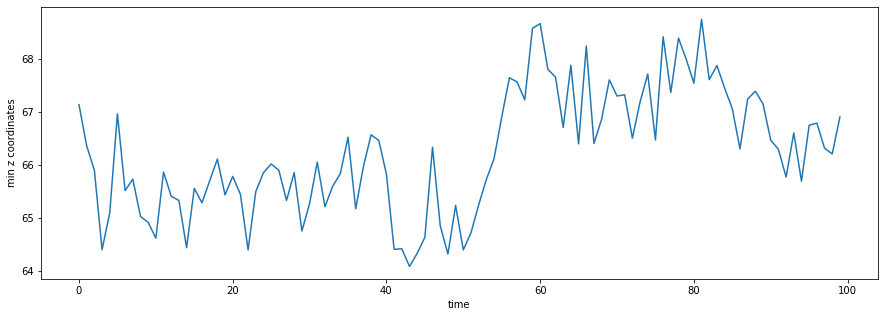

In [8]:
plt.clf()
plt_1 = plt.figure(figsize=(15, 5))
plt.plot(min_z_points["timestep"][:100], min_z_points["min_z"][:100])
plt.ylabel("min z coordinates")
plt.xlabel("time")
plt.show()

In [11]:
spmOut = spm(min_z_points[["min_z", "timestep"]].values, 0.5)


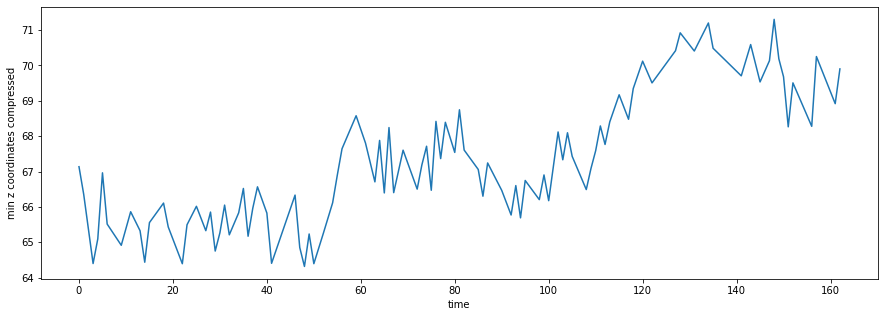

In [12]:
# plt.clf()
plt_2 = plt.figure(figsize=(15, 5))
plt.plot(spmOut[:, 1][:100], spmOut[:, 0][:100])
plt.ylabel("min z coordinates compressed")
plt.xlabel("time")
plt.show()

array([     0,      3,      5, ..., 199996, 199998, 199999])